In [28]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics|

In [29]:
coeprice = pd.read_csv('Results of COE Bidding Exercise - Results.csv')

In [30]:
coeprice.head()

Bidding Exercise Announcement Date  Year  \
0  February 2023 Second Open Bidding Exercise         22/2/2023  2023   
1  February 2023 Second Open Bidding Exercise         22/2/2023  2023   
2  February 2023 Second Open Bidding Exercise         22/2/2023  2023   
3  February 2023 Second Open Bidding Exercise         22/2/2023  2023   
4  February 2023 Second Open Bidding Exercise         22/2/2023  2023   

                             Category Quota   Premium Total Bids Received  \
0  Cat A (Cars up to 1600cc and 97kW)   508   $86,556                 702   
1   Cat B (Cars above 1600cc or 97kW)   436  $115,001                 768   
2    Cat C (Goods vehicles and buses)    47   $87,790                 136   
3                 Cat D (Motorcycles)   479   $12,189                 611   
4                        Cat E (Open)   132  $118,001                 274   

  Number of Successful Bids  
0                       504  
1                       401  
2                        40  
3                       453  
4                       129

In [31]:
coeprice.isnull().sum()

Bidding Exercise             0
Announcement Date            0
Year                         0
Category                     0
Quota                        0
Premium                      0
Total Bids Received          0
Number of Successful Bids    0
dtype: int64

In [32]:
cats = ['A', 'B', 'C', 'D', 'E']


coeprice['Cat'] = coeprice.apply(lambda x: cats.index(x.Category[4]), axis = 1)

In [33]:
coeprice['Cat'].replace('',np.nan,inplace = True)
coeprice.dropna(subset=['Cat'], inplace=True)
coeprice.isnull().sum()

Bidding Exercise             0
Announcement Date            0
Year                         0
Category                     0
Quota                        0
Premium                      0
Total Bids Received          0
Number of Successful Bids    0
Cat                          0
dtype: int64

In [34]:
coeprice['Month'] = coeprice.apply(lambda x: int(x['Announcement Date'].split('/')[1]), axis = 1)

In [35]:
coeprice

Bidding Exercise Announcement Date  Year  \
0     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
1     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
2     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
3     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
4     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
...                                          ...               ...   ...   
2475  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2476  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2477  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2478  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2479  December 2002 Second Open Bidding Exercise        15/12/2002  2002   

                                Category  Quota   Premium Total Bids Received  \
0     Cat A (Cars up to 1600cc and 97kW)    508   $86,556                 702   
1      Cat B (Cars above 1600cc or 97kW)    436  $115,001                 768   
2       Cat C (Goods vehicles and buses)     47   $87,790                 136   
3                    Cat D (Motorcycles)    479   $12,189                 611   
4                           Cat E (Open)    132  $118,001                 274   
...                                  ...    ...       ...                 ...   
2475  Cat A (Cars up to 1600cc and 97kW)  1,338   $26,993               1,546   
2476   Cat B (Cars above 1600cc or 97kW)    728   $23,890                 977   
2477    Cat C (Goods vehicles and buses)    579   $10,001                 682   
2478                 Cat D (Motorcycles)    991        $1                 734   
2479                        Cat E (Open)  1,091   $27,119               1,501   

     Number of Successful Bids  Cat  Month  
0                          504    0      2  
1                          401    1      2  
2                           40    2      2  
3                          453    3      2  
4                          129    4      2  
...                        ...  ...    ...  
2475                     1,337    0     12  
2476                       728    1     12  
2477                       544    2     12  
2478                       734    3     12  
2479                     1,082    4     12  

[2480 rows x 10 columns]

In [36]:
def check_quarter(month, year, min_year):
    if month <= 3:
        return 4*(year - min_year)
    elif month <= 6:
        return 1 + 4*(year - min_year)
    elif month <= 9:
        return 2 + 4*(year - min_year)
    return 3 + 4*(year - min_year)

In [37]:
coeprice['quarter'] = coeprice.apply(lambda row: check_quarter(row.Month, row.Year, 2002), axis = 1)

In [38]:
coeprice

Bidding Exercise Announcement Date  Year  \
0     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
1     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
2     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
3     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
4     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
...                                          ...               ...   ...   
2475  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2476  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2477  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2478  December 2002 Second Open Bidding Exercise        15/12/2002  2002   
2479  December 2002 Second Open Bidding Exercise        15/12/2002  2002   

                                Category  Quota   Premium Total Bids Received  \
0     Cat A (Cars up to 1600cc and 97kW)    508   $86,556                 702   
1      Cat B (Cars above 1600cc or 97kW)    436  $115,001                 768   
2       Cat C (Goods vehicles and buses)     47   $87,790                 136   
3                    Cat D (Motorcycles)    479   $12,189                 611   
4                           Cat E (Open)    132  $118,001                 274   
...                                  ...    ...       ...                 ...   
2475  Cat A (Cars up to 1600cc and 97kW)  1,338   $26,993               1,546   
2476   Cat B (Cars above 1600cc or 97kW)    728   $23,890                 977   
2477    Cat C (Goods vehicles and buses)    579   $10,001                 682   
2478                 Cat D (Motorcycles)    991        $1                 734   
2479                        Cat E (Open)  1,091   $27,119               1,501   

     Number of Successful Bids  Cat  Month  quarter  
0                          504    0      2       84  
1                          401    1      2       84  
2                           40    2      2       84  
3                          453    3      2       84  
4                          129    4      2       84  
...                        ...  ...    ...      ...  
2475                     1,337    0     12        3  
2476                       728    1     12        3  
2477                       544    2     12        3  
2478                       734    3     12        3  
2479                     1,082    4     12        3  

[2480 rows x 11 columns]

In [39]:
coeprice['Premium'] = coeprice.apply(lambda x: int(x.Premium[1:].replace(',', '')), axis = 1)

StopIteration: 

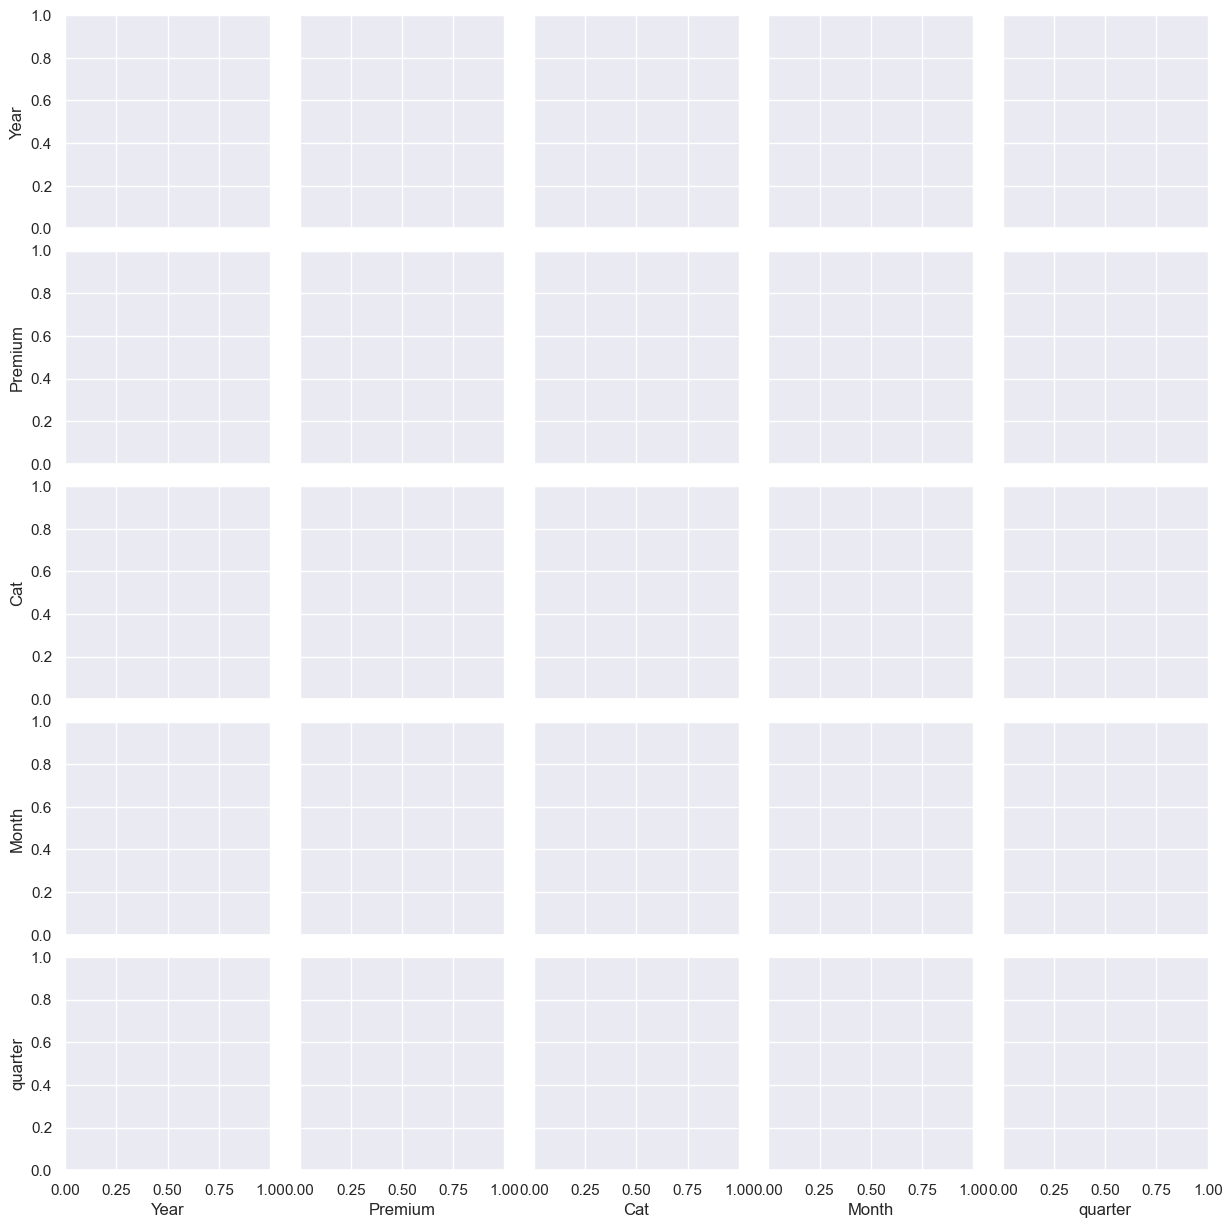

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(coeprice)

# Extracting coeprice of Category A

In [41]:
cat1 = coeprice.loc[coeprice['Cat'] == 0]
cat1

Bidding Exercise Announcement Date  Year  \
0     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
5      February 2023 First Open Bidding Exercise          8/2/2023  2023   
10     January 2023 Second Open Bidding Exercise         18/1/2023  2023   
15      January 2023 First Open Bidding Exercise          5/1/2023  2023   
20    December 2022 Second Open Bidding Exercise        21/12/2022  2022   
...                                          ...               ...   ...   
2455   October 2002 Second Open Bidding Exercise        15/10/2002  2002   
2460   November 2002 First Open Bidding Exercise         1/11/2002  2002   
2465  November 2002 Second Open Bidding Exercise        15/11/2002  2002   
2470   December 2002 First Open Bidding Exercise         1/12/2002  2002   
2475  December 2002 Second Open Bidding Exercise        15/12/2002  2002   

                                Category  Quota  Premium Total Bids Received  \
0     Cat A (Cars up to 1600cc and 97kW)    508    86556                 702   
5     Cat A (Cars up to 1600cc and 97kW)    509    86000                 663   
10    Cat A (Cars up to 1600cc and 97kW)    459    86000                 627   
15    Cat A (Cars up to 1600cc and 97kW)    462    80000                 649   
20    Cat A (Cars up to 1600cc and 97kW)    473    88007                 618   
...                                  ...    ...      ...                 ...   
2455  Cat A (Cars up to 1600cc and 97kW)  1,112    30758               1,624   
2460  Cat A (Cars up to 1600cc and 97kW)  1,346    29113               1,724   
2465  Cat A (Cars up to 1600cc and 97kW)  1,334    29008               1,942   
2470  Cat A (Cars up to 1600cc and 97kW)  1,332    28501               1,851   
2475  Cat A (Cars up to 1600cc and 97kW)  1,338    26993               1,546   

     Number of Successful Bids  Cat  Month  quarter  
0                          504    0      2       84  
5                          497    0      2       84  
10                         456    0      1       84  
15                         459    0      1       84  
20                         472    0     12       83  
...                        ...  ...    ...      ...  
2455                     1,110    0     10        3  
2460                     1,346    0     11        3  
2465                     1,328    0     11        3  
2470                     1,322    0     12        3  
2475                     1,337    0     12        3  

[496 rows x 11 columns]

In [42]:
# Extract Response and Predictors
y = pd.DataFrame(cat1["Premium"])
X = pd.DataFrame(cat1[["quarter"]])

In [43]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

Intercept of Regression 	: b =  [17336.16299598]
Coefficients of Regression 	: a =  [[512.02104577]]

  Predictors  Coefficients
0    quarter    512.021046



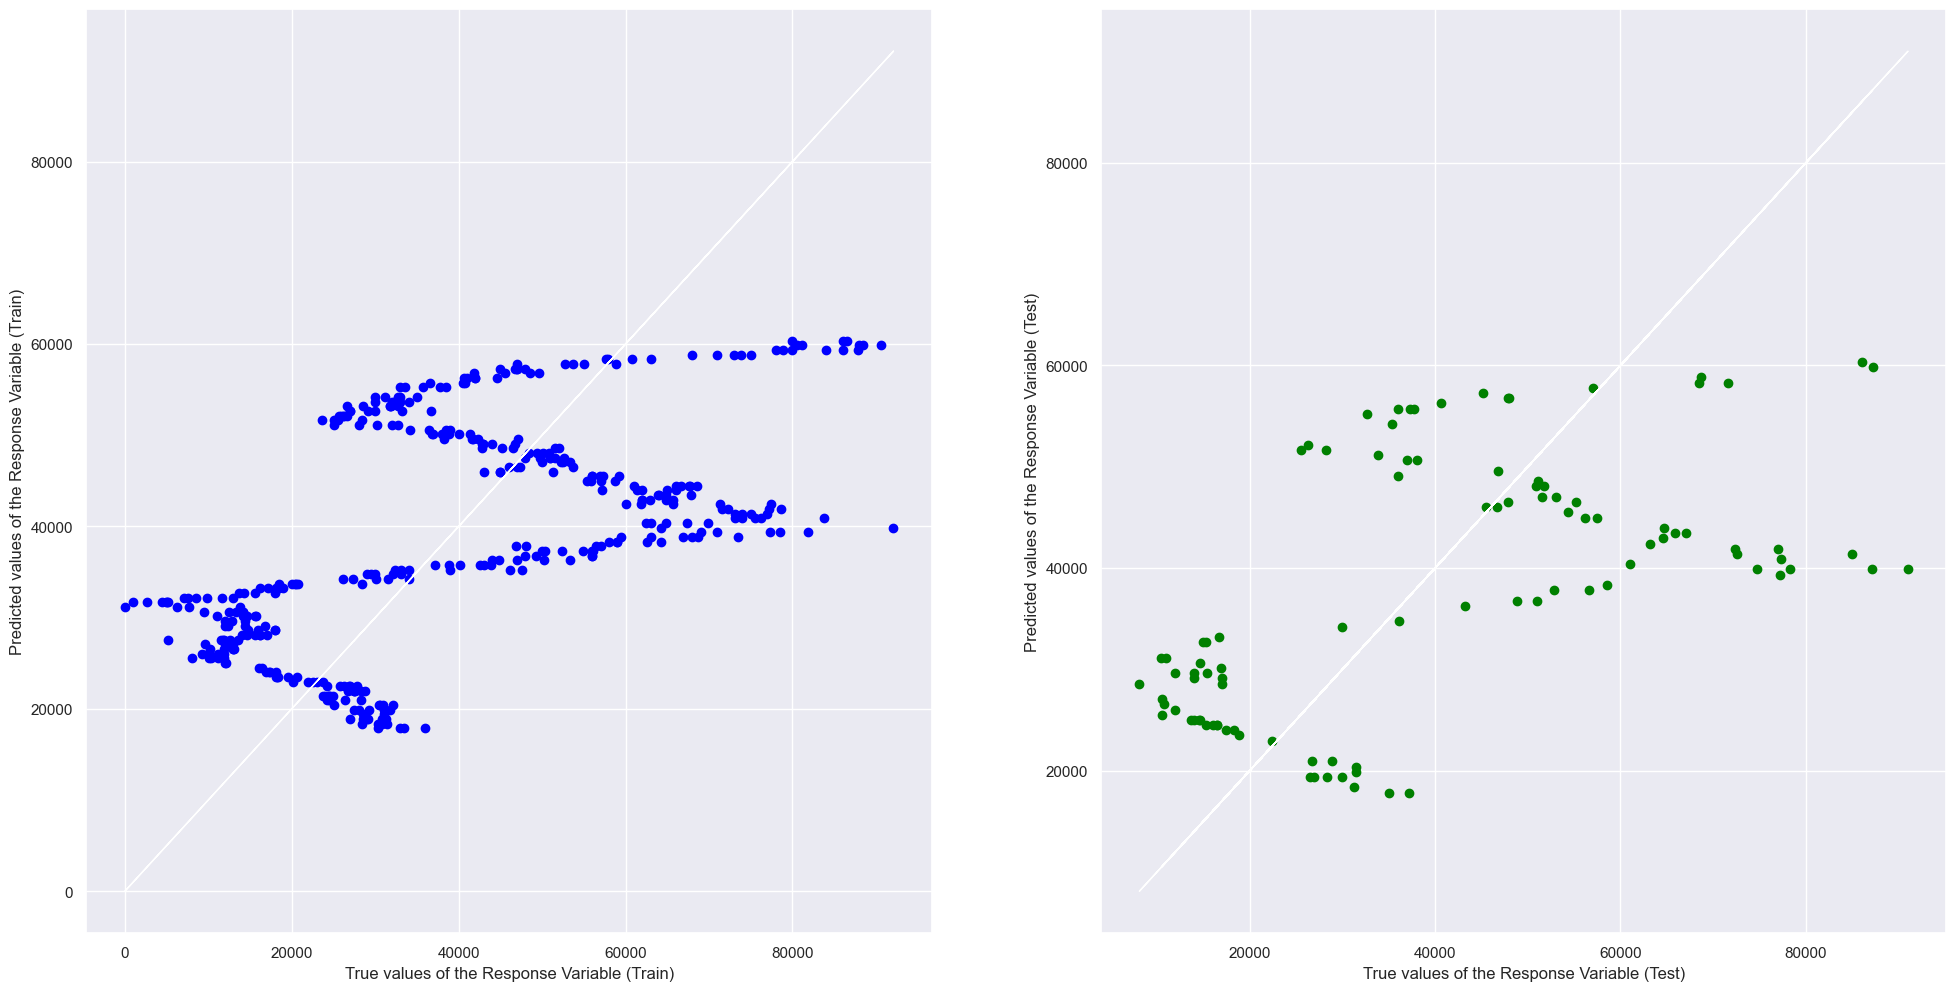

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33073169385604406
Mean Squared Error (MSE) 	: 305542966.03249675

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33195274353424753
Mean Squared Error (MSE) 	: 341604434.15735495



In [44]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [15]:
print(linreg.intercept_)

[17336.16299598]


# Regression Model for coeprice of Category A cars

# coeprice = 17336 + 512quarter

# Extracting coeprice of Category B

In [45]:
cat2 = coeprice.loc[coeprice['Cat'] == 2]
cat2

Bidding Exercise Announcement Date  Year  \
2     February 2023 Second Open Bidding Exercise         22/2/2023  2023   
7      February 2023 First Open Bidding Exercise          8/2/2023  2023   
12     January 2023 Second Open Bidding Exercise         18/1/2023  2023   
17      January 2023 First Open Bidding Exercise          5/1/2023  2023   
22    December 2022 Second Open Bidding Exercise        21/12/2022  2022   
...                                          ...               ...   ...   
2457   October 2002 Second Open Bidding Exercise        15/10/2002  2002   
2462   November 2002 First Open Bidding Exercise         1/11/2002  2002   
2467  November 2002 Second Open Bidding Exercise        15/11/2002  2002   
2472   December 2002 First Open Bidding Exercise         1/12/2002  2002   
2477  December 2002 Second Open Bidding Exercise        15/12/2002  2002   

                              Category Quota  Premium Total Bids Received  \
2     Cat C (Goods vehicles and buses)    47    87790                 136   
7     Cat C (Goods vehicles and buses)    44    85119                 108   
12    Cat C (Goods vehicles and buses)    78    77109                 182   
17    Cat C (Goods vehicles and buses)    70    77301                 183   
22    Cat C (Goods vehicles and buses)    69    78200                 147   
...                                ...   ...      ...                 ...   
2457  Cat C (Goods vehicles and buses)   523    16819                 651   
2462  Cat C (Goods vehicles and buses)   571    14995                 709   
2467  Cat C (Goods vehicles and buses)   576    13789                 736   
2472  Cat C (Goods vehicles and buses)   572    12552                 773   
2477  Cat C (Goods vehicles and buses)   579    10001                 682   

     Number of Successful Bids  Cat  Month  quarter  
2                           40    2      2       84  
7                           44    2      2       84  
12                          74    2      1       84  
17                          70    2      1       84  
22                          60    2     12       83  
...                        ...  ...    ...      ...  
2457                       517    2     10        3  
2462                       570    2     11        3  
2467                       567    2     11        3  
2472                       566    2     12        3  
2477                       544    2     12        3  

[496 rows x 11 columns]

In [46]:
# Extract Response and Predictors
y = pd.DataFrame(cat2["Premium"])
X = pd.DataFrame(cat2[["quarter"]])

In [47]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

Intercept of Regression 	: b =  [7015.49699995]
Coefficients of Regression 	: a =  [[559.94543429]]

  Predictors  Coefficients
0    quarter    559.945434



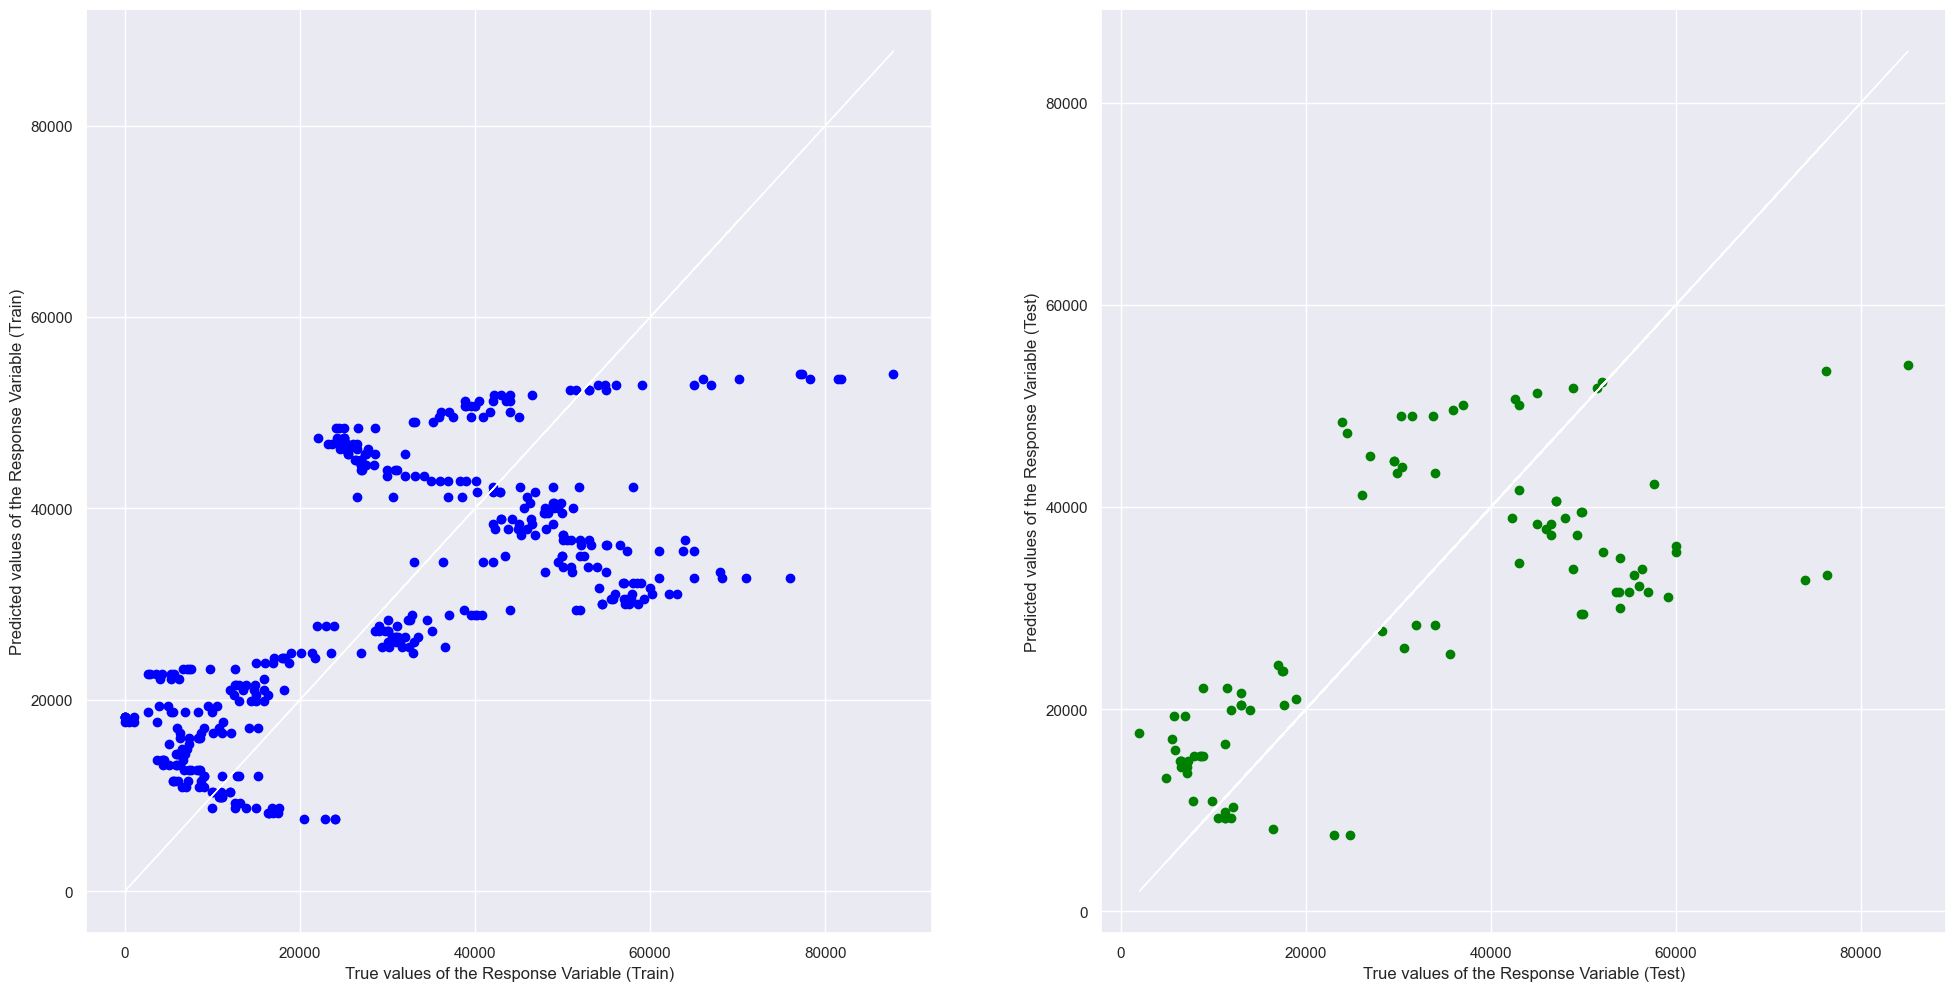

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4727659092028218
Mean Squared Error (MSE) 	: 201382147.98418474

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.488329357503691
Mean Squared Error (MSE) 	: 211570002.48851535



In [48]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [49]:
print(linreg.intercept_)

[7015.49699995]


# Regression Model for coeprice of Category B cars

# coeprice = 16666 + 685quarter


# Extracting COE prices for Cat D

In [21]:
cat4 = coeprice.loc[coeprice['Cat'] == 4]
cat4

Bidding Exercise Announcement Date    Year  \
23    December 2022 Second Open Bidding Exercise        21/12/2022  2022.0   
28     December 2022 First Open Bidding Exercise        07/12/2022  2022.0   
143   December 2021 Second Open Bidding Exercise        22/12/2021  2021.0   
148    December 2021 First Open Bidding Exercise        08/12/2021  2021.0   
263   December 2020 Second Open Bidding Exercise        23/12/2020  2020.0   
268    December 2020 First Open Bidding Exercise        09/12/2020  2020.0   
353   December 2019 Second Open Bidding Exercise        18/12/2019  2019.0   
358    December 2019 First Open Bidding Exercise        04/12/2019  2019.0   
473   December 2018 Second Open Bidding Exercise        19/12/2018  2018.0   
478    December 2018 First Open Bidding Exercise        05/12/2018  2018.0   
593   December 2017 Second Open Bidding Exercise        20/12/2017  2017.0   
598    December 2017 First Open Bidding Exercise        06/12/2017  2017.0   
712   December 2016 Second Open Bidding Exercise        21/12/2016  2016.0   
717    December 2016 First Open Bidding Exercise        07/12/2016  2016.0   
832   December 2015 Second Open Bidding Exercise        23/12/2015  2015.0   
837    December 2015 First Open Bidding Exercise        09/12/2015  2015.0   
952   December 2014 Second Open Bidding Exercise        17/12/2014  2014.0   
957    December 2014 First Open Bidding Exercise        03/12/2014  2014.0   
1072  December 2013 Second Open Bidding Exercise        18/12/2013  2013.0   
1077   December 2013 First Open Bidding Exercise        04/12/2013  2013.0   
1192  December 2012 Second Open Bidding Exercise        19/12/2012  2012.0   
1197   December 2012 First Open Bidding Exercise        05/12/2012  2012.0   
1312  December 2011 Second Open Bidding Exercise        21/12/2011  2011.0   
1317   December 2011 First Open Bidding Exercise        07/12/2011  2011.0   
1432  December 2010 Second Open Bidding Exercise        22/12/2010  2010.0   
1437   December 2010 First Open Bidding Exercise        08/12/2010  2010.0   
1552  December 2009 Second Open Bidding Exercise        23/12/2009  2009.0   
1557   December 2009 First Open Bidding Exercise        09/12/2009  2009.0   
1672  December 2008 Second Open Bidding Exercise        17/12/2008  2008.0   
1677   December 2008 First Open Bidding Exercise        03/12/2008  2008.0   
1903   December 2007 First Open Bidding Exercise        01/12/2007  2007.0   
1908  December 2007 Second Open Bidding Exercise        15/12/2007  2007.0   
2023   December 2006 First Open Bidding Exercise        01/12/2006  2006.0   
2028  December 2006 Second Open Bidding Exercise        15/12/2006  2006.0   
2143   December 2005 First Open Bidding Exercise        01/12/2005  2005.0   
2148  December 2005 Second Open Bidding Exercise        15/12/2005  2005.0   
2263   December 2004 First Open Bidding Exercise        01/12/2004  2004.0   
2268  December 2004 Second Open Bidding Exercise        15/12/2004  2004.0   
2383   December 2003 First Open Bidding Exercise        01/12/2003  2003.0   
2388  December 2003 Second Open Bidding Exercise        15/12/2003  2003.0   
2473   December 2002 First Open Bidding Exercise        01/12/2002  2002.0   
2478  December 2002 Second Open Bidding Exercise        15/12/2002  2002.0   

                 Category   Quota  Premium  Total Bids Received  \
23    Cat D (Motorcycles)   465.0  11690.0                647.0   
28    Cat D (Motorcycles)   441.0  12100.0                544.0   
143   Cat D (Motorcycles)   426.0   9601.0                562.0   
148   Cat D (Motorcycles)   420.0   9401.0                584.0   
263   Cat D (Motorcycles)   530.0   7689.0                710.0   
268   Cat D (Motorcycles)   526.0   7670.0                767.0   
353   Cat D (Motorcycles)   697.0   3658.0                850.0   
358   Cat D (Motorcycles)   693.0   3789.0                908.0   
473   Cat D (Motorcycles)  1114.0   3789.0               1375.0   
478   C

In [22]:
# Extract Response and Predictors
y = pd.DataFrame(cat4["Premium"])
X = pd.DataFrame(cat4[["year"]])

In [23]:
# Split the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size = 0.20)

Intercept of Regression 	: b =  [17336.16299598]
Coefficients of Regression 	: a =  [[512.02104577]]

  Predictors  Coefficients
0    quarter    512.021046



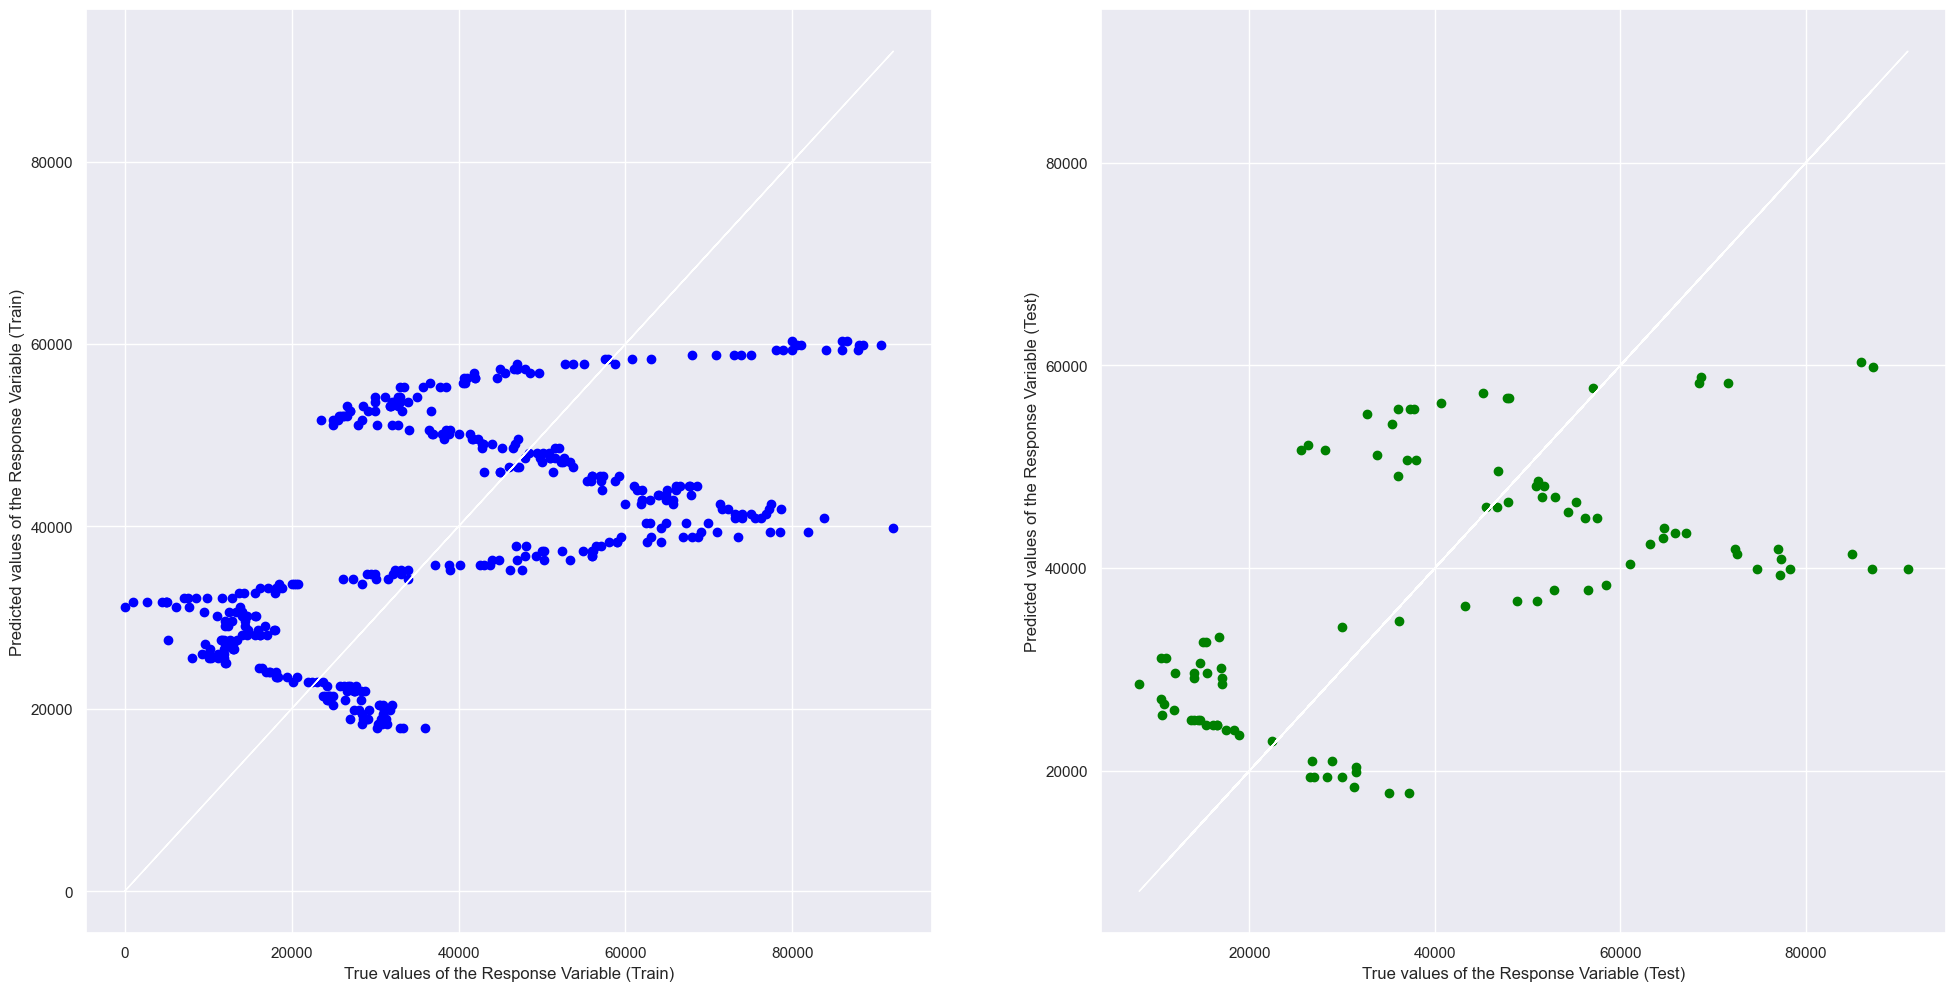

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.33073169385604406
Mean Squared Error (MSE) 	: 305542966.03249675

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.33195274353424753
Mean Squared Error (MSE) 	: 341604434.15735495



In [24]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [25]:
print(linreg.intercept_)

[17336.16299598]


# coeprice = 17336 + 512quarter